
📌 Random Forest
Precision: 0.67
Recall: 0.97
F1-score: 0.79
F2-score: 0.89


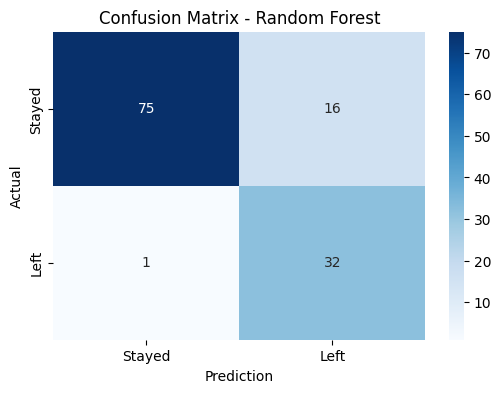

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, fbeta_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
my_data=pd.read_excel('C:/Users/user/Downloads/Jypiter/Logistička regresija SAMO BGW.xlsx')
my_data=my_data[['SEKTOR','godine','staž','zarada', 'churn']]
label_encoder = LabelEncoder()
my_data['SEKTOR'] = label_encoder.fit_transform(my_data['SEKTOR']) 
sektor_ime_po_kodu = list(label_encoder.classes_)
y = my_data['churn']
X= my_data[['SEKTOR','godine','staž','zarada']]
X = X.rename(columns={
    'staž': 'Tenure in the Company',
    'zarada': 'Salary',
    'godine': 'Age',
    'SEKTOR': 'Department'
})

rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=100, max_depth=4, random_state=42)
rf_model.fit(X, y)


rf_probs = rf_model.predict_proba(X)[:, 1]
rf_preds = (rf_probs >= 0.4).astype(int)


def evaluate_model(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    f2 = fbeta_score(y_true, y_pred, beta=2)

    print(f"\n📌 {title}")
    print("Precision:", round(precision, 2))
    print("Recall:", round(recall, 2))
    print("F1-score:", round(f1, 2))
    print("F2-score:", round(f2, 2))

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Stayed', 'Left'],
                yticklabels=['Stayed', 'Left'])
    plt.xlabel("Prediction")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {title}")
    plt.show()

evaluate_model(y, rf_preds, "Random Forest")


In [8]:
rf_probs = rf_model.predict_proba(X)[:, 1]
rf_preds = (rf_probs >= 0.4).astype(int)
my_data['rf_pred'] = rf_preds
rizicni_rf = my_data[(my_data['churn'] == 0) & (my_data['rf_pred'] == 1)]



In [9]:

export_df = my_data.copy()
rf_probs_both = rf_model.predict_proba(X)
export_df['procenat_ostanka'] = rf_probs_both[:, 0]
export_df['procenat_odlaska'] = rf_probs_both[:, 1]
export_df['krajnja_predikcija'] = (export_df['procenat_odlaska'] >= 0.4).astype(int)
#export_df.to_excel("C:/Users/jelena.pantic/Downloads/Jypiter/rf_predikcija_analiza.xlsx", index=False)

#print("✅ Fajl je uspešno sačuvan kao 'rf_predikcija_analiza.xlsx'")

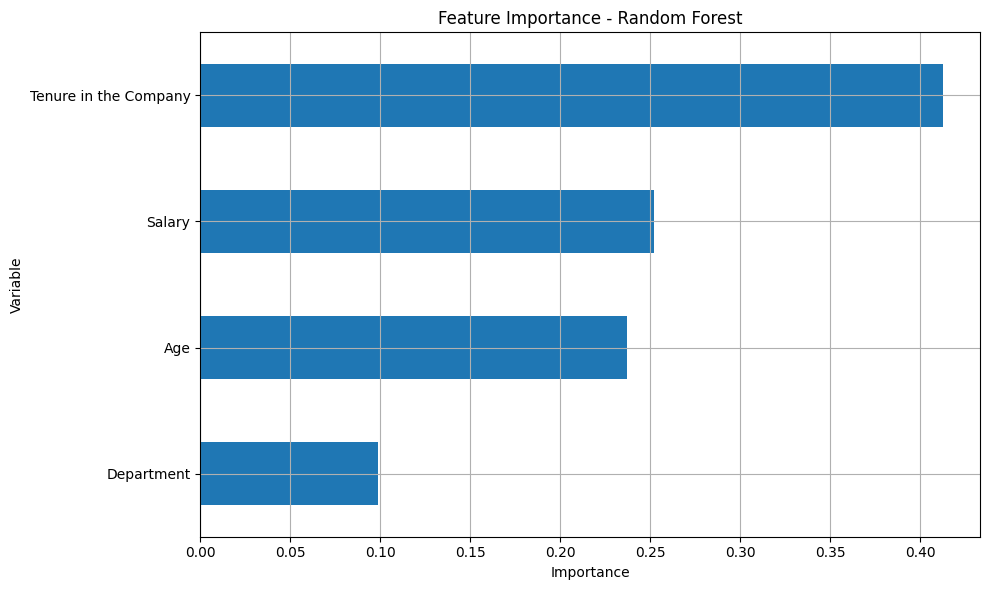

In [10]:

feature_names = X.columns
importances = rf_model.feature_importances_
importances_series = pd.Series(importances, index=feature_names)
importances_series.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Variable")
plt.grid(True)
plt.tight_layout()
plt.show()